In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle as pkl

In [2]:
# Load check size list
n_cells = 49
with open(f'../simulate/spikes_data_test/stimulus_data_{n_cells}cells.pkl', 'rb') as file:
    _, check_size_list, __, ___ = pkl.load(file).values()

check_size_list = np.array(check_size_list[1:])
n_sizes = len(np.unique(check_size_list))

In [3]:
# Read file names
def read_folder_names_from_txt(filename):
    folder_names = []
    with open(filename, 'r') as file:
        lines = file.readlines()
        for line in lines:
            folder_name = line.strip()
            folder_names.append(folder_name)
    return folder_names

folder_names = read_folder_names_from_txt("../models/folder_names.txt")

In [4]:
# Load bootstrap information
bootstrap_names = [name for name in folder_names if name != 'true_full_model']

n_bootstraps = 10
I_dep_bootstrap = np.zeros((n_bootstraps,n_sizes))
I_indep_bootstrap = np.zeros((n_bootstraps, n_sizes))
for i_bootstrap in range(n_bootstraps):
    I_indep_bootstrap_temp = np.load(f'./information_submission/information_indep_{bootstrap_names[i_bootstrap]}.npy')
    I_indep_bootstrap[i_bootstrap,:] = I_indep_bootstrap_temp.mean((0,1))
    I_dep_bootstrap_temp = np.load(f'./information_submission/information_dep_{bootstrap_names[i_bootstrap]}.npy')
    I_dep_bootstrap[i_bootstrap,:] = I_dep_bootstrap_temp.mean((0,1))

In [5]:
# Load true model
I_indep_temp = np.load(f'./information_submission/information_indep_true_full_model.npy')
I_indep = I_indep_temp.mean((0,1))

I_dep_temp = np.load(f'./information_submission/information_dep_true_full_model.npy')
I_dep = I_dep_temp.mean((0,1))

### Plot

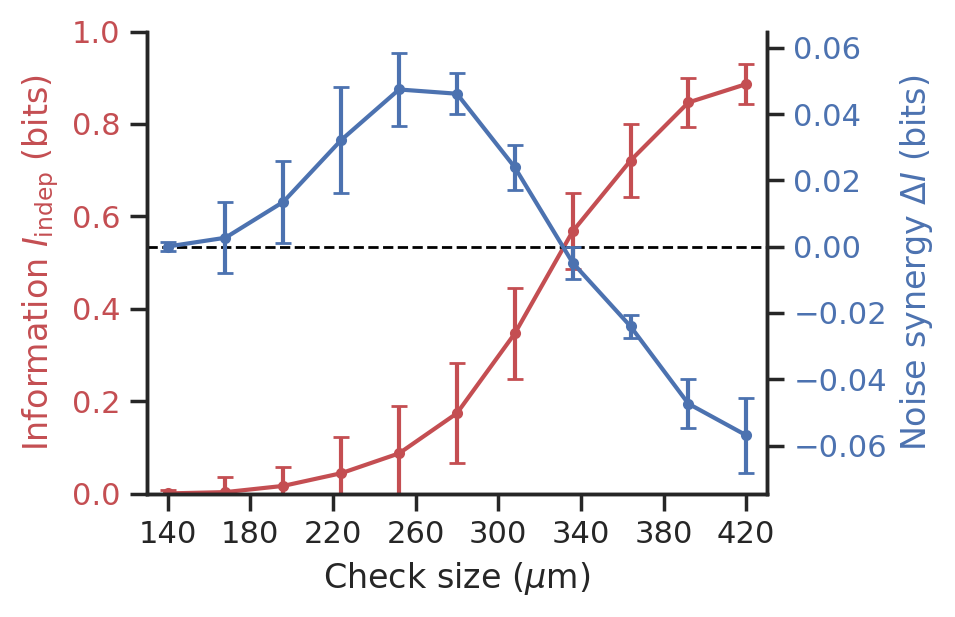

In [6]:
sns.set(style="ticks")
palette = sns.color_palette()
sns.set_palette(palette)

# Parameters
mean_NN_distance = 6
spatial_units = 3.5 * 8
x_values = np.unique(check_size_list) * spatial_units
info_unit = 1 / np.log(2)

# Calculate standard deviations for error bars
I_indep_std = np.std(I_indep_bootstrap, axis=0)
I_dep_std = np.std(I_dep_bootstrap, axis=0)
delta_I_std = np.std(I_dep_bootstrap - I_indep_bootstrap, axis=0)

# Figure
fig, ax1 = plt.subplots(figsize=(4, 3), dpi=200)

# Plotting the independent I values with error bars
ax1.errorbar(x_values, I_indep * info_unit, yerr=I_indep_std * info_unit, color=palette[3], ls='-', marker='o', markersize=3, capsize=3)
ax1.set_xlabel(r'Check size ($\mu$m)')
ax1.set_ylabel(r'Information $I_{\rm indep}$ (bits)', color=palette[3])
ax1.tick_params(axis='y', labelcolor=palette[3])
ax1.set_xlim(x_values.min() - 10, x_values.max() + 10)
ax1.set_ylim(0, 1)

# Define the x-ticks explicitly
x_values_to_show = [int(x) for i,x in enumerate(np.arange(140,420+10,10)) if i%4==0]
ax1.set_xticks(x_values_to_show)
ax1.set_xticklabels([f"{x}" for x in x_values_to_show])

# Removing the top spine for the first axis
ax1.spines['top'].set_visible(False)

# Plotting the delta I values with error bars on a secondary y-axis
ax2 = ax1.twinx()
ax2.axhline(0, ls='--', color='black', lw=1)
ax2.errorbar(x_values, (I_dep - I_indep) * info_unit, yerr=delta_I_std * info_unit, color=palette[0], ls='-', marker='o', markersize=3, capsize=3)
ax2.set_ylabel(r'Noise synergy $\Delta I$ (bits)', color=palette[0])
ax2.tick_params(axis='y', labelcolor=palette[0])

# Removing the top spine for the second axis
ax2.spines['top'].set_visible(False)

plt.savefig('panelB.pdf')


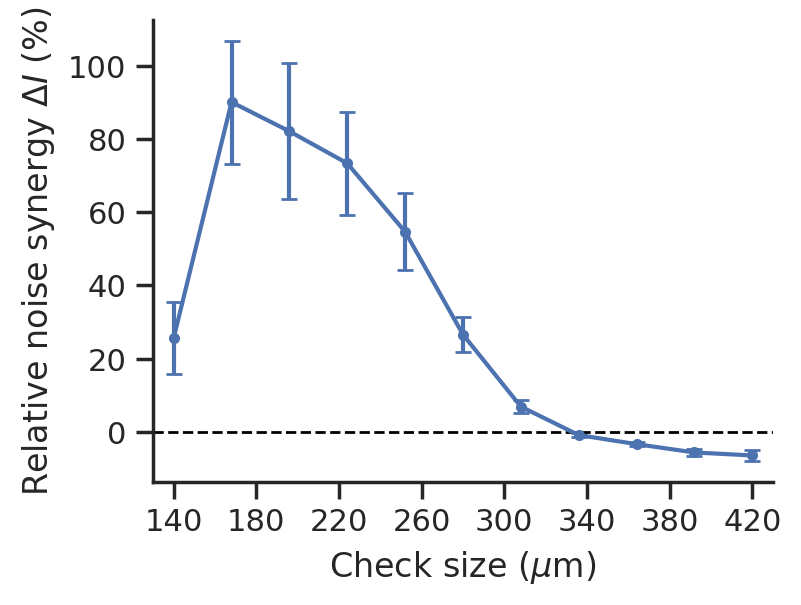

In [7]:
sns.set(style="ticks")
palette = sns.color_palette()
sns.set_palette(palette)

# Parameters
mean_NN_distance = 6
spatial_units = 3.5 * 8
x_values = np.unique(check_size_list) * spatial_units
info_unit = 1 / np.log(2)

# Calculate standard deviations for error bars
delta_I_rel = (I_dep - I_indep)/I_indep*100
delta_I_rel_std = np.std(((I_dep_bootstrap-I_indep_bootstrap)/I_indep_bootstrap*100), axis=0)

# Figure
fig, ax1 = plt.subplots(figsize=(4, 3), dpi=200)

# Plotting the independent I values with error bars
ax1.errorbar(x_values, delta_I_rel, yerr=delta_I_rel_std, color=palette[0], ls='-', marker='o', markersize=3, capsize=3)
ax1.set_xlabel(r'Check size ($\mu$m)')
ax1.set_ylabel(r'Relative noise synergy $\Delta I$ (%)')
ax1.tick_params(axis='y')
ax1.set_xlim(x_values.min() - 10, x_values.max() + 10)

# Define the x-ticks explicitly
x_values_to_show = [int(x) for i,x in enumerate(np.arange(140,420+10,10)) if i%4==0]
ax1.set_xticks(x_values_to_show)
ax1.set_xticklabels([f"{x}" for x in x_values_to_show])
ax1.axhline(0, ls='--', color='black', lw=1)

# Removing the top spine for the first axis
ax1.spines[['top', 'right']].set_visible(False)

plt.savefig('panelC.pdf')